In [1]:
import tensorflow as tf

c:\python39\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
c:\python39\lib\site-packages\numpy\.libs\libopenblas.GK7GX5KEQ4F6UYO3P26ULGBQYHGQO7J4.gfortran-win_amd64.dll
c:\python39\lib\site-packages\numpy\.libs\libopenblas.NOIJJG62EMASZI6NYURL6JBKM4EVBGM7.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [2]:
mnist = tf.keras.datasets.mnist

In [3]:
(x_train, y_train),(x_test , y_test) = mnist.load_data()

In [4]:
x_train.shape

(60000, 28, 28)

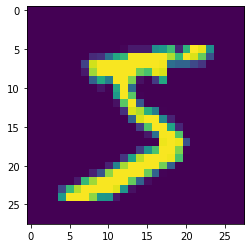

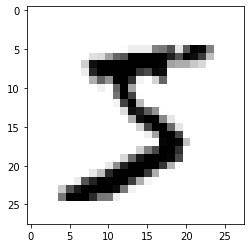

In [5]:
import matplotlib.pyplot as plt
plt.imshow(x_train[0])
plt.show()
plt.imshow(x_train[0] , cmap = plt.cm.binary)

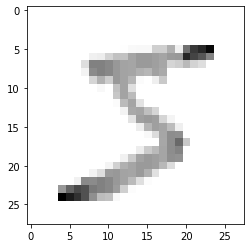

In [6]:
x_train = tf.keras.utils.normalize(x_train , axis = 1)
x_test = tf.keras.utils.normalize(x_test , axis = 1)
plt.imshow(x_train[0] , cmap = plt.cm.binary)

In [7]:
print(x_train[0])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

In [8]:
print(y_train[0])

5


In [9]:
import numpy as np
img_size = 28
x_trainer = np.array(x_train).reshape(-1,img_size,img_size,1)
x_tester = np.array(x_test).reshape(-1,img_size,img_size,1)
print('Training shape' , x_trainer.shape)
print('Testing shape' , x_tester.shape)

Training shape (60000, 28, 28, 1)
Testing shape (10000, 28, 28, 1)


In [10]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout , Activation, Flatten , Conv2D, MaxPooling2D

In [11]:
model = Sequential()

model.add(Conv2D(32 , (3,3) , activation = 'relu' , input_shape= x_trainer.shape[1:]))
# model.add(MaxPooling2D((2,2)))

model.add(Conv2D(64 , (3,3) , activation = 'relu'))
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.25))

# model.add(Conv2D(64 , (3,3) , activation = 'relu'))
# model.add(MaxPooling2D((2,2)))

model.add(Flatten())

model.add(Dense(256, activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation = 'softmax'))

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 12, 12, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 9216)              0         
_________________________________________________________________
dense (Dense)                (None, 256)               2359552   
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0

In [13]:
# compile model that we have created
model.compile(optimizer = 'adam' , loss = 'sparse_categorical_crossentropy' , metrics = ['accuracy'])

In [14]:
# fit x_trainer , y_train to the model to see accuracy of model:
model.fit(x_trainer,y_train, epochs = 10 , validation_split = 0.3 , batch_size = 128,verbose=1)

Epoch 1/10
329/329 [==============================] - 106s 307ms/step - loss: 0.2856 - accuracy: 0.9114 - val_loss: 0.0796 - val_accuracy: 0.9771
Epoch 2/10
329/329 [==============================] - 105s 319ms/step - loss: 0.0911 - accuracy: 0.9724 - val_loss: 0.0627 - val_accuracy: 0.9815
Epoch 3/10
329/329 [==============================] - 102s 309ms/step - loss: 0.0630 - accuracy: 0.9804 - val_loss: 0.0562 - val_accuracy: 0.9837
Epoch 4/10
329/329 [==============================] - 101s 305ms/step - loss: 0.0501 - accuracy: 0.9845 - val_loss: 0.0476 - val_accuracy: 0.9860
Epoch 5/10
329/329 [==============================] - 102s 311ms/step - loss: 0.0406 - accuracy: 0.9873 - val_loss: 0.0442 - val_accuracy: 0.9869
Epoch 6/10
329/329 [==============================] - 105s 319ms/step - loss: 0.0364 - accuracy: 0.9881 - val_loss: 0.0417 - val_accuracy: 0.9881
Epoch 7/10
329/329 [==============================] - 106s 322ms/step - loss: 0.0290 - accuracy: 0.9911 - val_loss: 0.0410 -

In [15]:
test_loss, test_acc = model.evaluate(x_tester, y_test)
print('Test loss on 10,000 test samples' , test_loss)
print('Validation Accuracy on 10,000 samples' , test_acc)

313/313 [==============================] - 7s 20ms/step - loss: 0.0372 - accuracy: 0.9905
Test loss on 10,000 test samples 0.037163492292165756
Validation Accuracy on 10,000 samples 0.9904999732971191


In [16]:
predictions = model.predict([x_tester])

In [17]:
print(np.argmax(predictions[54]))

6


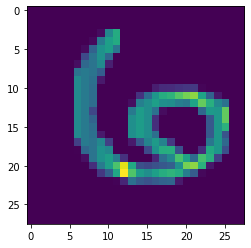

In [18]:
plt.imshow(x_test[54])

In [19]:
model.save("digit_recogniser_model.h5")

In [20]:
import cv2

img = cv2.imread('3.jpg')
gray = cv2.cvtColor(img , cv2.COLOR_BGR2GRAY)
resize = cv2.resize(gray,(28,28), interpolation = cv2.INTER_AREA)
new_img = tf.keras.utils.normalize(resize, axis=1)
new_img = np.array(new_img).reshape(-1,img_size,img_size,1)
predictions = model.predict(new_img)

In [21]:
print(np.argmax(predictions))

3
